In [13]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

# from imblearn.over_sampling import SMOTE

In [1]:
from imblearn.over_sampling import SMOTE

In [21]:
df2 = pd.read_csv('df2_info.csv')
df2 = df2.set_index('id')
df2.drop(columns = 'SPEECH_musical', inplace= True)

In [22]:
df2.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,SPEECH_speechy
id,,,,,,,,,,,,,,,,,,,,,
30oTS7bm0aH3p7lqjEIu8q,0.0253,0.877,216596,0.740,0.000003,0.2860,-5.885,0.271,95.224,0.754,...,0,0,0,1,0,0,0,1,0,0
2g8HN35AnVGIk7B8yMucww,0.4320,0.778,252747,0.578,0.000000,0.1380,-7.220,0.274,84.487,0.758,...,0,0,1,0,0,0,0,1,0,0
33ZXjLCpiINn8eQIDYEPTD,0.0146,0.763,325507,0.786,0.011400,0.0817,-6.472,0.229,93.857,0.504,...,1,0,1,0,0,0,0,1,0,0
2qOm7ukLyHUXWyR4ZWLwxA,0.3210,0.796,260000,0.748,0.000049,0.2170,-5.409,0.126,82.384,0.802,...,0,0,1,0,0,0,0,1,0,0
119c93MHjrDLJTApCVGpvx,0.5700,0.479,252187,0.549,0.023900,0.1270,-10.551,0.373,180.985,0.576,...,0,1,1,0,0,0,0,1,0,1


## Smote

1) import smote

2) train test split

3) create smote instance

4) resample data

In [31]:
df3 = df2.drop(columns = ['speechiness', 'SPEECH_speechy'])
df4 = df2['SPEECH_speechy']

## Train Test Split

In [166]:
X = df3
y = df4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print('Imbalance Preview:')
print(y.value_counts())
print(y.value_counts(normalize = True))

Imbalance Preview:
0    1077
1     332
Name: SPEECH_speechy, dtype: int64
0    0.764372
1    0.235628
Name: SPEECH_speechy, dtype: float64


In [167]:
print(y.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())

0    1077
1     332
Name: SPEECH_speechy, dtype: int64
1    809
0    809
dtype: int64


## Scaling Data

In [168]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

#Scaled train data, followed by scaled test data as arrays
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#convert trained data array to dataframe with columns from df1
scaled_df_train = pd.DataFrame(X_train_scaled, columns = df3.columns)
scaled_df_train.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo,valence,key_0,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,2.647728,1.302019,-1.502658,-2.613450,5.471883,-0.695585,-1.084610,0.836017,0.382281,-0.294046,...,-0.306423,-0.287285,-0.338748,1.153202,-1.153202,-0.024868,-0.078873,-0.152212,0.260276,-0.190088
1,-0.769829,-1.183765,-0.189597,-0.131531,-0.218458,-0.310442,-0.224571,-0.725265,-0.759105,-0.294046,...,-0.306423,-0.287285,-0.338748,1.153202,-1.153202,-0.024868,-0.078873,-0.152212,0.260276,-0.190088
2,-0.976837,0.540608,-0.475223,0.249821,-0.218329,-0.793796,0.073796,1.108972,-0.870214,-0.294046,...,-0.306423,-0.287285,-0.338748,1.153202,-1.153202,-0.024868,-0.078873,-0.152212,0.260276,-0.190088
3,-0.958370,0.995962,-0.666188,0.993771,-0.194325,-0.503014,1.225047,-0.575387,1.346904,-0.294046,...,-0.306423,-0.287285,3.430363,-0.972663,0.972663,-0.024868,-0.078873,-0.152212,0.260276,-0.190088
4,-0.798639,-0.452212,-1.291790,0.149794,-0.218458,-0.663490,1.710161,-1.228949,-0.738904,-0.294046,...,-0.306423,3.749740,-0.338748,1.153202,-1.153202,-0.024868,-0.078873,-0.152212,0.260276,-0.190088


# Dummy Classifier to Beat

In [169]:
# import models / tools

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

#function to print metrics
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))

# Fitting and training the dummy
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train_resampled)

# Dummy predictions
dum_pred = dummy.predict(X_test_scaled)

#Printing out results
print_metrics(y_test, dum_pred)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.7592067988668555
F1 Score: 0.0


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# K-Nearest Neighbor

In [180]:
gs_results.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [191]:
#import knn
from sklearn.neighbors import KNeighborsClassifier 

# instantiate knn
clf = KNeighborsClassifier(n_neighbors= 1, p= 1, weights= 'uniform')

# fit classifier into your model
clf.fit(X_train_scaled, y_train_resampled)
### When I did clf.fit over here, I created the model and trained it for future iterations

#output is an array of the predicted types of glass
test_preds = clf.predict(X_test_scaled) 

#clf is my where my model exists

In [192]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'macro')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'macro')))
    
print_metrics(y_test, test_preds) # comparing my test vs predictable

Precision Score: 0.5429370629370629
Recall Score: 0.5404302019315188
Accuracy Score: 0.6742209631728046
F1 Score: 0.5413460777999977


In [183]:
### Set new model equal to your grid search.  you're reinstatiated

##  KNN Grid Search

In [184]:
from sklearn.model_selection import GridSearchCV


In [185]:
grid_params = {'n_neighbors': list(range(1,15)), 
               'weights': ['uniform', 'distance'],
               'p' :[1,2]}

gs = GridSearchCV(clf, grid_params, cv=10)

gs_results = gs.fit(X_train_scaled, y_train_resampled)

In [ ]:
grid_params = {'n_neighbors': list(range(1,15)), 
               'weights': ['uniform', 'distance'],
               'p' :[1,2]}

gs = GridSearchCV(clf, grid_params, cv=10)

gs_results = gs.fit(X_train_scaled, y_train_resampled)

clf_knn = gs_results.best_estimator_
clf_knn.fit(X_train_scaled, y_train_resampled)

gs_knn_test = clf_knn.predict(X_test_scaled)

print_metrics(gs_knn_test, y_test)

In [208]:
clf_knn = gs_results.best_estimator_
clf_knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

In [212]:
gs_knn_test = clf_knn.predict(X_test_scaled)

print_metrics(gs_knn_test, y_test)

Precision Score: 0.5404302019315188
Recall Score: 0.5429370629370629
Accuracy Score: 0.6742209631728046
F1 Score: 0.5413460777999977


Creating new model using the better paramater

In [219]:
clf_knn = gs.best_estimator_
clf_knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

In [186]:
gs_results.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [187]:
gs_results.best_score_

0.857849196538937

COME BACK AND REINSTANTIATE THE THE MODEL

# Logistic Regression

In [150]:
#import model
from sklearn.linear_model import LogisticRegression

#instantiate model
clf2 = LogisticRegression(solver = 'liblinear')

#fit the model
clf2 = logreg.fit(X_train_scaled, y_train_resampled)

#test your test data on the model
test_preds2 = clf2.predict(X_test_scaled)

#check your performance
print_metrics(y_test, test_preds) # comparing my test vs predictable

Precision Score: 0.5440268700072621
Recall Score: 0.5425812115891132
Accuracy Score: 0.6713881019830028
F1 Score: 0.5431950022311468


#### Running the model on the train and test data again and see how well it does.

In [162]:
y_hat_test = clf2.predict(X_test_scaled)
y_hat_train = clf2.predict(X_train_scaled)

The Model predicted 67% of training data correctly.

In [163]:
residuals = np.abs(y_train_resampled - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1096
1     522
dtype: int64
0    0.677379
1    0.322621
dtype: float64


The model predicted 62% of the testing data correctly.

In [164]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    219
1    134
Name: SPEECH_speechy, dtype: int64
0    0.620397
1    0.379603
Name: SPEECH_speechy, dtype: float64


In [ ]:
#grid search 

lg_param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,45]}


# Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree

In [193]:
#instatiate the Decision Tree Classifier
clf3 = DecisionTreeClassifier()

#Fit the model to the scaled training data
clf3.fit(X_train_scaled, y_train_resampled) 

#testing test data on model
test_preds3 = clf3.predict(X_test_scaled)

print_metrics(y_test, test_preds3)

Precision Score: 0.5710570347737524
Recall Score: 0.5857550482879719
Accuracy Score: 0.6515580736543909
F1 Score: 0.5722476725284469


### Run Gridsearch to determine optimal parameters

# Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
clf4 = RandomForestClassifier()
clf4.fit(X_train_scaled, y_train_resampled)
test_preds4 = clf4.predict(X_test_scaled)

print_metrics(y_test, test_preds4)

Precision Score: 0.6240263418779209
Recall Score: 0.5768876207199298
Accuracy Score: 0.7478753541076487
F1 Score: 0.5829140391636243


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Randomized Search

In [215]:
#import randomized search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#state parameters in a dictionary
param_distrib = {'n_estimators': randint(10, 1000),
                 "max_depth": randint(1, 50),
              "max_features": randint(1, 16),
                 "min_samples_leaf": randint(2, 1000),
              "min_samples_split": randint(2, 1000),
                 
                }

# INSTANCE
clf_RF = RandomizedSearchCV(RandomForestClassifier(), param_distrib, n_iter=500, cv =3)

In [ ]:
#rs = RandomizedSearchCV(RandomForestClassifier(), param_distrib, n_iter=500, cv =3)

#rs_results = gs.fit(X_train_scaled, y_train_resampled)

In [216]:
#I WAS DUMB AND SHOULD HAVE FITTED IT W/O RS (i.e. just clf_RF), RS IS MY MODEL NOW

rs = clf_RF.fit(X_train_scaled, y_train_resampled)

In [217]:
rs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=46, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=23, min_samples_split=34,
                       min_weight_fraction_leaf=0.0, n_estimators=178,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
#

clf_rf_actual = rs.best_estimator_
clf_rf_actual.fit(X_train_scaled, y_train_resampled)
rs_test_preds = clf_rf_actual.predict(X_test_scaled)
print_metrics(rs_test_preds, y_test)

Precision Score: 0.6087357330992098
Recall Score: 0.6447691408533022
Accuracy Score: 0.7535410764872521
F1 Score: 0.618539542162988


# Boosting 

In [ ]:
#Xadaboost, gradient boosting?

# SVM, XG Boost

In [228]:
#import models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [234]:
#Creating Model Instances
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()

#Fitting Models
adaboost_clf.fit(X_train_scaled, y_train_resampled)
gbt_clf.fit(X_train_scaled, y_train_resampled)

#Predicting test & training data on the adaboost models
adaboost_train_preds = adaboost_clf.predict(X_train_scaled)
adaboost_test_preds = adaboost_clf.predict(X_test_scaled)

#Predicting test & training data on the Gradient Boost models
gbt_clf_train_preds = gbt_clf.predict(X_train_scaled)
gbt_clf_test_preds = gbt_clf.predict(X_test_scaled)

In [236]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train_resampled, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train_resampled, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.811495673671199
F1-Score: 0.8046124279308136

Model: Gradient Boosted Trees
Accuracy: 0.9066749072929543
F1-Score: 0.9008535784635587

Testing Metrics
Model: AdaBoost
Accuracy: 0.7025495750708215
F1-Score: 0.3636363636363636

Model: Gradient Boosted Trees
Accuracy: 0.7648725212464589
F1-Score: 0.3565891472868217


## Performance of the Adaboost Model (pre-gridsearch)

In [237]:
print_metrics(adaboost_test_preds, y_test)

Precision Score: 0.5831870061457419
Recall Score: 0.5867673992673993
Accuracy Score: 0.7025495750708215
F1 Score: 0.5847756679549655


In [255]:
param_distrib = {'n_estimators': [10, 50, 100, 200, 400],
                 "learning_rate": [1.0, 0.5, 0.1], 
                }
#instantiate grid search
gs_abc = GridSearchCV(adaboost_clf, param_distrib, cv=10)

#fit grid search
gs_results_abc = gs_abc.fit(X_train_scaled, y_train_resampled)

#assign better parameters to new model
clf_abc = gs_results_abc.best_estimator_

#fit improved model
clf_abc.fit(X_train_scaled, y_train_resampled)

#obtain test predictions for improved model
abc_test_preds = clf_knn.predict(X_test_scaled)

print_metrics(abc_test_preds, y_test)

Precision Score: 0.5404302019315188
Recall Score: 0.5429370629370629
Accuracy Score: 0.6742209631728046
F1 Score: 0.5413460777999977


In [254]:
param_distrib = {'n_estimators': [10, 50, 100, 200, 400],
                 "learning_rate": [1.0, 0.5, 0.1], 
                }

gs = GridSearchCV(adaboost_clf, param_distrib, cv=10)
gs_results = gs.fit(X_train_scaled, y_train_resampled)
clf_knn = gs_results.best_estimator_
clf_knn.fit(X_train_scaled, y_train_resampled)

# INSTANCE
# clf_ABC = GridSearchCV(AdaBoostClassifier(), param_distrib, n_iter=500, cv =4)
clf_ABC.fit(X_train_scaled, y_train_resampled)

In [ ]:
#creating improved instance
clf_AB_actual = clf_ABC.best_estimator_

#fitting improved model
clf_AB_actual.fit(X_train_scaled, y_train_resampled)

#test the test data over the model
AB_test_preds = clf_AB_actual.predict(X_test_scaled)

#check for improvement in the metrics
print_metrics(AB_test_preds, y_test)

In [ ]:
grid_params = {'n_neighbors': list(range(1,15)), 
               'weights': ['uniform', 'distance'],
               'p' :[1,2]}

gs = GridSearchCV(clf, grid_params, cv=10)

gs_results = gs.fit(X_train_scaled, y_train_resampled)

clf_knn = gs_results.best_estimator_
clf_knn.fit(X_train_scaled, y_train_resampled)

gs_knn_test = clf_knn.predict(X_test_scaled)

print_metrics(gs_knn_test, y_test)

## Performance of the Gradient Boost Model (pre-gridsearch)

In [240]:
print_metrics(gbt_clf_test_preds, y_test)

Precision Score: 0.5961150131694469
Recall Score: 0.6610400117681672
Accuracy Score: 0.7648725212464589
F1 Score: 0.6063708301425443


In [241]:
# Grid Search

# XG Boost

In [244]:
conda install py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/flatironschool/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB
    conda-package-handling-1.3.11|           py37_0         260 KB
    libxgboost-0.90            |       h0a44026_0         2.3 MB
    py-xgboost-0.90            |   py37h0a44026_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  conda-package-han~ pkgs/main/osx-64::conda-package-handling-1.3.11-py37_0
  libxgboost         pkgs/main/osx-64::libxgboost-0.90-h0a44026_0
  llvm-openmp        pkgs/main/osx-64::llvm-openmp-4.0.1-hc

In [245]:
#import packages

import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [251]:
#create XGBoost Instance
xg_clf = xgb.XGBClassifier()

#fit the data to the model
xg_clf.fit(X_train_scaled, y_train_resampled)

#test the training samples to the model
xg_training_preds = xg_clf.predict(X_train_scaled)

#test the test samples to the model
xg_testing_preds = xg_clf.predict(X_test_scaled)

#checking accuracy
training_accuracy = accuracy_score(y_train_resampled, xg_training_preds)
testing_accuracy = accuracy_score(y_test, xg_testing_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(testing_accuracy * 100))
print('')
print_metrics(y_test, xg_testing_preds)



Training Accuracy: 89.86%
Validation accuracy: 77.62%

Precision Score: 0.6858228980322003
Recall Score: 0.6276777875329236
Accuracy Score: 0.7762039660056658
F1 Score: 0.6422587969674035


In [ ]:
# KNN, Logistic Regression, Decision Tree, Random Forest
# Adaboost, Gradient Boost, XG Boost

In [ ]:
#KNN, Random Forest

# Archived Functions

In [280]:
def ROC_func(clf, X_test, y_test):
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'ROC Curve - {clf.__class__.__name__}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

    print('AUC (pred_proba): ', roc_auc_score(y_test, y_pred_prob))

AUC (pred_proba):  0.7203248463564531


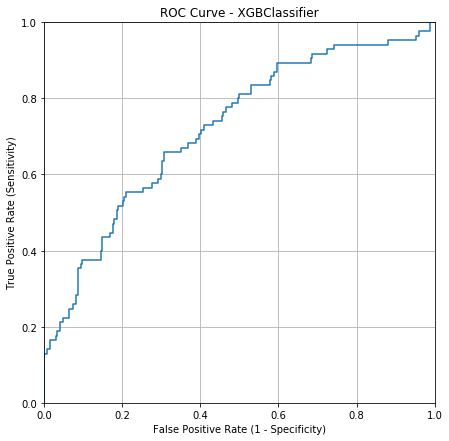

In [283]:
ROC_func(xg_clf, X_test_scaled, y_test)

AUC (pred_proba):  0.7108428446005266


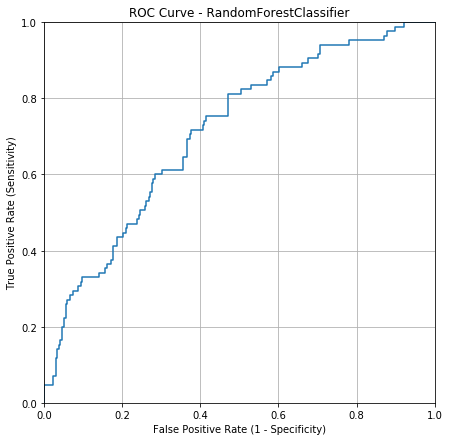

In [284]:
ROC_func(clf_rf_actual, X_test_scaled, y_test)

ROC: Receiver Operating Characteristic curve
AUC: Area Under the Curve



In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    labels = ['Scotland', 'USA', 'Canada', 'Ireland', 'Japan', 'Rest_of_World']
    # Compute confusion matrix
    cmat = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [ ]:
# Plot feature importance in a model

In [276]:
def plot_feature_importance(model, x_train, n=30):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

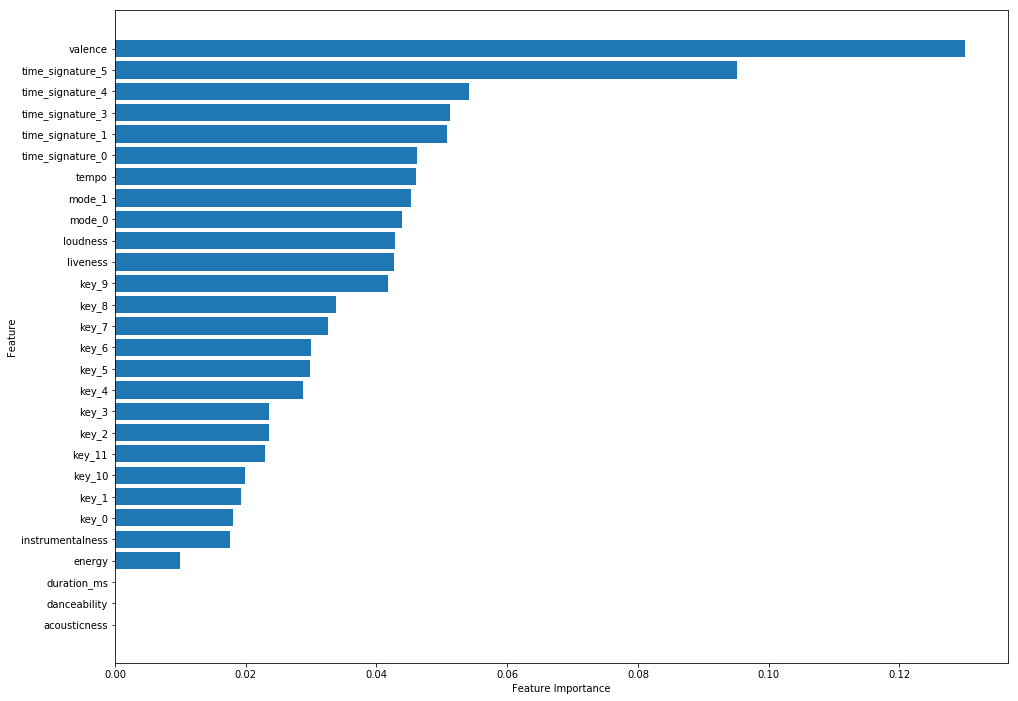

In [279]:
plot_feature_importance(xg_clf, X_train)

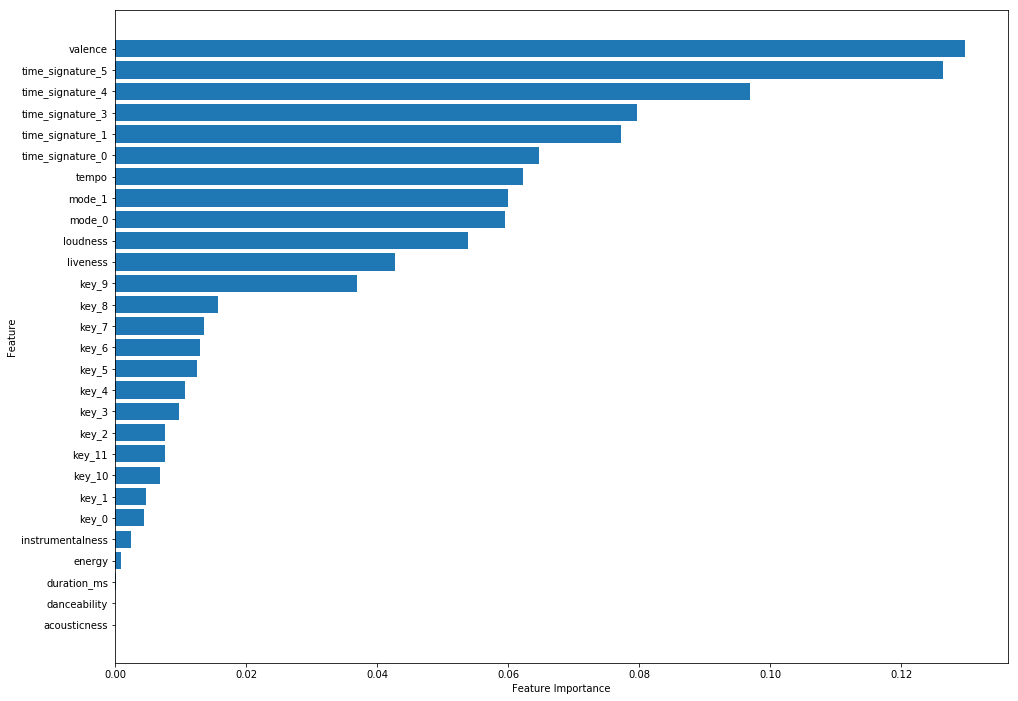

In [278]:
plot_feature_importance(clf_rf_actual, X_train)

In [256]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Pseudocode/Outline:
    #Print the confusion matrix (optional)
    #Create the basic matrix.
    #Add title and Axis Labels
    #Add appropriate Axis Scales
    #Add Labels to Each Cell
    #Add a Side Bar Legend Showing Colors
    
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#models to still run:

XG boost, adaboost, svm,

run grid search 